# ML 03 - CROP PREDICTION

## TEAM NAME - 590492-U76TW79VUse , College - BITS Pilani K K Birla Goa Campus


### MEMBERS - 
### 1. Yash Phadke (Leader) , ID - 2021A4PS1942G
### 2. Karan Bania , ID - 2021A7PS2582G         

### Problem Statement - 
Predicting the optimal crop that could be grown in a particular location based on the
soil composition, rainfall, temperature and return of investment is essential for any
farmer of the modern world. This could not only save farmers from spending extra
money on fertilizers but also avoid the dangerous practice of growing the same crops
on the same patch of land repeatedly, which depletes the solid from its natural
resources. <br>
Objective: <br>
● Given the dataset, you need to predict what soil would be best for the farmer to
grow based on the geolocation, season, and price. <br>
● Make a user-friendly interface for the public to interact with your ML model. 
<br>
<br>
Brownie Points:<br>
● Suggest a variety of crops that could be cultivated for the geolocations provided
  in the dataset and rank them according to the sales price.<br>
● Improve your model by factoring in the various types of soil found in various
  parts of India and its general nutritional composition.

### References and Datasets used - 
We have used only the datasets provided in the Problem Statement pdf. <br>
1) https://www.kaggle.com/datasets/rajanand/rainfall-in-india <br>
2) https://currentaffairs.adda247.com/major-soil-types-of-india-map/ <br>
3) https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset <br>
4) https://www.kaggle.com/datasets/thammuio/all-agriculture-related-datasets-for-india <br>

https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiboJu4oo79AhUtTmwGHXEHCB0QFnoECA8QAQ&url=https%3A%2F%2Fwww.researchgate.net%2Ffigure%2FYield-of-Major-Crops-in-Quintal-per-Hectare_tbl1_46471048&usg=AOvVaw2tk4NY-47aapeQ2CHLyZ01 
We refer to this site for minimum yield of any crop under any cicumstance(optimistic assumption) per hectare 1.3 tonne per hectare. <br>

## ML PART - 

#### 1) Importing Relevant Modules & Packages  - 

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
#from torch.nn import functional as fn
#from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### 2) Importing Datasets - 

In [32]:
NPK_crop = pd.read_csv("./Data/NPK_temp_ph_crop.csv")

Price_crop = pd.read_csv("./Data/Price_Commodity")

Rainfall = pd.read_csv("./Data/Rainfall_Normal.csv")

#### 3) Visualising Our Data - 

In [33]:
print(NPK_crop.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [34]:
print(Price_crop.head())

                 state       district      market              commodity  \
0  Andaman and Nicobar  South Andaman  Port Blair             Amaranthus   
1  Andaman and Nicobar  South Andaman  Port Blair         Banana - Green   
2  Andaman and Nicobar  South Andaman  Port Blair  Bhindi(Ladies Finger)   
3  Andaman and Nicobar  South Andaman  Port Blair           Bitter gourd   
4  Andaman and Nicobar  South Andaman  Port Blair           Black pepper   

          variety arrival_date  min_price  max_price  modal_price  
0      Amaranthus   04/03/2019       6000       8000         7000  
1  Banana - Green   04/03/2019       4500       5500         5000  
2          Bhindi   04/03/2019       6000       8000         7000  
3           Other   04/03/2019       6000       8000         7000  
4           Other   04/03/2019     110000     130000       120000  


In [35]:
print(Rainfall.head())

                 STATE_UT_NAME       DISTRICT    JAN   FEB    MAR    APR  \
0  ANDAMAN And NICOBAR ISLANDS        NICOBAR  107.3  57.9   65.2  117.0   
1  ANDAMAN And NICOBAR ISLANDS  SOUTH ANDAMAN   43.7  26.0   18.6   90.5   
2  ANDAMAN And NICOBAR ISLANDS  N & M ANDAMAN   32.7  15.9    8.6   53.4   
3            ARUNACHAL PRADESH          LOHIT   42.2  80.8  176.4  358.5   
4            ARUNACHAL PRADESH     EAST SIANG   33.3  79.5  105.9  216.5   

     MAY    JUN    JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  \
0  358.5  295.5  285.0  271.9  354.8  326.0  315.2  250.9  2805.2    165.2   
1  374.4  457.2  421.3  423.1  455.6  301.2  275.8  128.3  3015.7     69.7   
2  343.6  503.3  465.4  460.9  454.8  276.1  198.6  100.0  2913.3     48.6   
3  306.4  447.0  660.1  427.8  313.6  167.1   34.1   29.8  3043.8    123.0   
4  323.0  738.3  990.9  711.2  568.0  206.9   29.5   31.7  4034.7    112.8   

   Mar-May  Jun-Sep  Oct-Dec  
0    540.7   1207.2    892.1  
1    483.5  

#### 4) Model and Our Approach - 

The 3 datasets are brimming with data of all sorts, but we need to extract the "features" releveant to the model we plan to implement. <br>
Model :- <br>
The Farmer enters his Location(State, District), current date and his soil's NPK & pH values; also he/she/they have to select a market
We use the above datasets to extract infomation about predicted rainfall and price for a crop, train a model on basis of N, P, K, pH, Rainfall, Price and Date and predict <u>THREE</u> most suitable crops.

#### 5) Data Pre-processing - 

###### 5.a) Picking "Features" - 

In [36]:
'''
DO NOT RUN THIS CELL MORE THAN ONCE.
'''

'''
We Drop temperature and humidity because we don't think they stay constant over a period of time and it would be 
irrelevant to ask a person for these details.
'''
NPK_crop = NPK_crop.drop(["temperature","humidity"], axis = 1)

'''
We multiply monthly rainfall in NPK_Crop by 5 to get an estimate of total rainfall required; we make this 
assumption because on an average crops take 5 months to grow.
'''
NPK_crop['rainfall'] *= 5

'''
We drop monthly rainfall values because we anyways need a month range over which to grow our crops.
'''
Rainfall = Rainfall.drop(["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC","ANNUAL"],
                         axis = 1)

'''
We drop the columns Variety, max_price and min_price because we think Variety just makes the dataset overly 
complicated and it is not assured that the farmer will be able to get those varieties either, also many varieties
have their value set to 'Other', this would not lead to a good Neural Net.
We drop Max and Min price and keep the Modal one so that we get a fairly realistic estimate.
We drop the date because it's the same for all records.
'''
Price_crop = Price_crop.drop(['variety','modal_price','max_price','arrival_date'], axis = 1)


#### 5.b) Merging Datasets - 

In [37]:
'''
We merge different datasets now, i.e. our two datasets have different values for 'commodity' and 'crop' so we stick
with the data in NPK_crop, because that has way more relevant data contributing towards crop growth than the other
one with market and price.
'''
Price_crop['commodity'] = Price_crop['commodity'].replace(['Masur Dal',
                                                            'Cluster beans',
                                                            'Lentil (Masur)(Whole)',
                                                            'Bengal Gram Dal (Chana Dal)',
                                                            'Arhar (Tur/Red Gram)(Whole)',
                                                            'Arhar Dal(Tur Dal)',
                                                            'Castor Seed',
                                                            'Peas(Dry)'],
                                                          value = 'lentil'
                                                          )
Price_crop['commodity'] = Price_crop['commodity'].replace(['Green Gram Dal (Moong Dal)',
                                                            'Green Gram (Moong)(Whole)',
                                                            'Gram Raw(Chholia)'
                                                            ],
                                                          value = 'mungbean')
Price_crop['commodity'] = Price_crop['commodity'].replace(['Paddy(Dhan)(Common)',
                                                            'Rice',
                                                            'Broken Rice',
                                                            'Paddy(Dhan)(Basmati)'],
                                                          value = 'rice'
                                                          )
Price_crop['commodity'] = Price_crop['commodity'].replace(['Coconut Oil',
                                                            'Tender Coconut',
                                                            'Coconut',
                                                            'Copra'],
                                                          value = 'coconut'
                                                         )
Price_crop['commodity'] = Price_crop['commodity'].replace(['Black Gram (Urd Beans)(Whole)',
                                                            'Black Gram Dal (Urd Dal)',
                                                            'Surat Beans (Papadi)'],
                                                          value = 'blackgram'
                                                         )
Price_crop['commodity'] = Price_crop['commodity'].replace(['Cowpea (Lobia/Karamani)',
                                                          'Cowpea(Veg)',
                                                          'Karamani'],
                                                          value = 'chickpea'
                                                         )
Price_crop['commodity'] = Price_crop['commodity'].replace(['Pegeon Pea (Arhar Fali)',
                                                            'Field Pea'],
                                                          value = 'pigeonpeas'
                                                         )
Price_crop['commodity'] = Price_crop['commodity'].replace(['Papaya (Raw)',
                                                            'Papaya'],
                                                          value = 'papaya'
                                                         )
Price_crop['commodity'] = Price_crop['commodity'].replace(['Beans',
                                                           'Moath Dal'],
                                                          value = 'mothbeans'
                                                         )
Price_crop['commodity'] = Price_crop['commodity'].replace(['Mango (Raw-Ripe)',
                                                            'Mango'],
                                                          value = 'mango'
                                                         )
Price_crop['commodity'] = Price_crop['commodity'].replace(['Orange',
                                                            'Mousambi(Sweet Lime)'],
                                                          value = 'orange'
                                                         )
Price_crop['commodity'] = Price_crop['commodity'].replace(['Jute', 
                                                           'Karbuja(Musk Melon)',
                                                           'Pomegranate',
                                                           'Grapes',
                                                           'Banana',
                                                           'Apple',
                                                           'Cotton',
                                                           'Water Melon',
                                                           'Indian Beans (Seam)'],
                                                          value = ['jute',
                                                                   'muskmelon',
                                                                   'pomegranate',
                                                                   'grapes',
                                                                   'banana',
                                                                   'apple',
                                                                   'cotton',
                                                                   'watermelon',
                                                                   'kidneybeans']
                                                         )
crops_to_keep = ['rice','chickpea','kidneybeans','pigeonpeas','mothbeans'
  ,'mungbean' ,'blackgram', 'lentil' ,'pomegranate' ,'banana' ,'mango' ,'grapes',
  'watermelon', 'muskmelon' ,'apple' ,'orange' ,'papaya', 'coconut', 'cotton',
  'jute']

Price_crop = Price_crop[Price_crop.commodity.isin(crops_to_keep)]

Price_crop = Price_crop.rename(columns = {'commodity' : 'label'})


'''
Our data is ready so we merge it!
This will give out a dataframe with different prices we can get by selling a crop at any market.
'''
Temporary1 = Price_crop
Temporary1.rename(columns = {'commodity':'label'}, inplace = True)
Temporary1 = Temporary1.drop(['district','state','market'], axis = 1)
Temporary1['label'].replace(to_replace = ['rice','chickpea','kidneybeans','pigeonpeas','mothbeans'
 ,'mungbean' ,'blackgram', 'lentil' ,'pomegranate' ,'banana' ,'mango' ,'grapes',
 'watermelon', 'muskmelon' ,'apple' ,'orange' ,'papaya', 'coconut', 'cotton',
 'jute'], value = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']
                                         ,inplace  = True)

Temporary2 = NPK_crop
Temporary2['label'].replace(to_replace = ['rice','chickpea','kidneybeans','pigeonpeas','mothbeans'
 ,'mungbean' ,'blackgram', 'lentil' ,'pomegranate' ,'banana' ,'mango' ,'grapes',
 'watermelon', 'muskmelon' ,'apple' ,'orange' ,'papaya', 'coconut', 'cotton',
 'jute'], value = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19'],
                                        inplace = True)

crop_label_dict = { 0 : 'rice' ,1 :'chickpea', 2 : 'kidneybeans', 3 : 'pigeonpeas', 4 :'mothbeans' 
 ,5 :'mungbean'  ,  6 : 'blackgram',   7 : 'lentil',  8 :'pomegranate' ,9 : 'banana'  ,  10 : 'mango' , 11 :'grapes' ,
 12 :'watermelon' ,  13 :'muskmelon' , 14 : 'apple' , 15 :'orange' ,  16 : 'papaya' ,   17 : 'coconut' ,   18 :'cotton',
   19 : 'jute'}

#Important when displaying outputs

Main_DF = Temporary1.merge(Temporary2, how = 'inner')

print(Main_DF.head())

X = Main_DF.iloc[:,1:].to_numpy()
Y = Main_DF.iloc[:,0].to_numpy()

  label  min_price   N   P   K        ph    rainfall
0     7       8000  32  76  15  7.604110  216.789769
1     7       8000  13  61  22  7.728832  234.156506
2     7       8000  38  60  20  7.491217  234.022630
3     7       8000  11  74  17  6.633865  233.176433
4     7       8000  37  71  16  7.324863  230.691650


###### 5.c) Scaling Data - 

In [38]:
'''
Using the Standard Scaler from Scikit Learn to bring all inputs to equal orders of magnitude.
'''
Scaler = StandardScaler()
'''
Split into Train, Test, and CV.
'''
X_train, X_, y_train, y_ = train_test_split(X, Y, test_size = 0.4, random_state = 1)
X_test, X_cv, y_test, y_cv = train_test_split(X_, y_, test_size = 0.5, random_state = 1)
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)
X_cv = Scaler.transform(X_cv)

###### 5.d) Tensor-ing the data - 

In [39]:
X_train = torch.from_numpy(X_train.astype("float32"))
X_test = torch.from_numpy(X_test.astype("float32"))
X_cv = torch.from_numpy(X_cv.astype("float32"))


y_train = torch.from_numpy(y_train.astype("float32"))
y_train = y_train.type(torch.LongTensor) #otherwise raises an error
y_test = torch.from_numpy(y_test.astype("float32"))
y_test = y_test.type(torch.LongTensor) #same
y_cv = torch.from_numpy(y_cv.astype("float32"))
y_cv = y_cv.type(torch.LongTensor)

#### 6) Implementing the Model in Pytorch - 

In [40]:
class NeuralNet(nn.Module):
    '''
    We use a custom model that uses - 
    
    1) a Linear input layer
    2) a ReLU hidden layer
    3) a Linear output layer
    
    and then we apply softmax to calculate probabilities of a crops.
    '''
    def __init__(self, inputs, hidden_layer, outputs):
        super(NeuralNet, self).__init__()
        
        self.layer1 = nn.Linear(inputs, hidden_layer)
        self.layer2 = nn.ReLU()
        self.layer3 = nn.Linear(hidden_layer, outputs)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        
        return out

#### 7) Model -

In [41]:
model = NeuralNet(inputs = 6, hidden_layer = 6, outputs = 20)

#### 8) Deciding the Loss function - 

In [42]:
'''
This function calculates the softmax by itself and requires raw inputs, which is why we use a Linear output layer.
'''
criterion = nn.CrossEntropyLoss()

#### 9) Deciding the optimizer -  

In [43]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.03)

#### 10) Training the Model & Collecting Data to plot - 

In [44]:
epochs = 500
for epoch in range(epochs):
    #FORWARD PASS
    
    y_pred = model(X_train)
    
    #LOSS AND GRADIENTS
    
    loss = criterion(y_pred, y_train)
    
    loss.backward()
    
    optimizer.step()
    
    #ZEROING OUT GRADIENTS
    
    optimizer.zero_grad()
    
    #DISPLAY DATA
    
    if((epoch+1) % 50 == 0):
        print(f"epoch - {epoch+1} , Loss - {loss.item():.6f}")

epoch - 50 , Loss - 0.536912
epoch - 100 , Loss - 0.295296
epoch - 150 , Loss - 0.206417
epoch - 200 , Loss - 0.161890
epoch - 250 , Loss - 0.124786
epoch - 300 , Loss - 0.110116
epoch - 350 , Loss - 0.100649
epoch - 400 , Loss - 0.092620
epoch - 450 , Loss - 0.086531
epoch - 500 , Loss - 0.081701


#### 11) Plots and Selecting Parameters - 

In [17]:
'''
This cell helps us visualize that different Learnin Rates can have drastic effects on the Model.
'''
lr_list = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]
loss_hist = []
min_loss = 100
best_lr = 0
best_params = {}
size = len(lr_list)
for i in range(size):
    
    optimizer.param_groups[0]['lr'] = lr_list[i]

    epochs = 500
    loss = 0
    for epoch in range(epochs):
    
        #FORWARD PASS
    
        y_pred = model(X_train)
    
        #LOSS AND GRADIENTS
    
        loss = criterion(y_pred, y_train)
    
        loss.backward()
    
        optimizer.step()
    
        #ZEROING OUT GRADIENTS
    
        optimizer.zero_grad()
    
        #DISPLAY DATA
    
        if((epoch+1) % 50 == 0):
            if( i == 0 or i == 4 or i == 6):
                loss_hist.append(loss.item())
                #print(f"learning_rate = {lr_list[i]:.4f} , epoch - {epoch+1} , Loss - {loss.item():.6f}")
    
    with torch.no_grad():
        y_pred = model(X_cv)
        y_cls = torch.argmax(y_pred,dim = 1)
        accuracy = y_cls.eq(y_cv).sum() / float(y_cv.shape[0])
        print(f"lr = {lr_list[i]}, accuracy = {accuracy*100:.5f}")
    
    min_loss = min(loss, min_loss)
    if(min_loss == loss):
        best_params = model.state_dict()
#         best_params = state_dict['classifier weight']
#         best_params = model.parameters()
        best_lr = i
        

print(f"BEST LEARNING RATE - {lr_list[best_lr]} , LOSS AT BEST LR - {min_loss}")

optimizer.param_groups[0]['lr'] = lr_list[best_lr]
state_dict = model.state_dict()
state_dict = best_params



lr = 0.001, accuracy = 96.73395


lr = 0.003, accuracy = 96.79816


lr = 0.01, accuracy = 97.07339


lr = 0.03, accuracy = 97.22018


lr = 0.1, accuracy = 97.14679


lr = 0.3, accuracy = 96.13761


lr = 1, accuracy = 59.65137
BEST LEARNING RATE - 0.1 , LOSS AT BEST LR - 0.07017042487859726


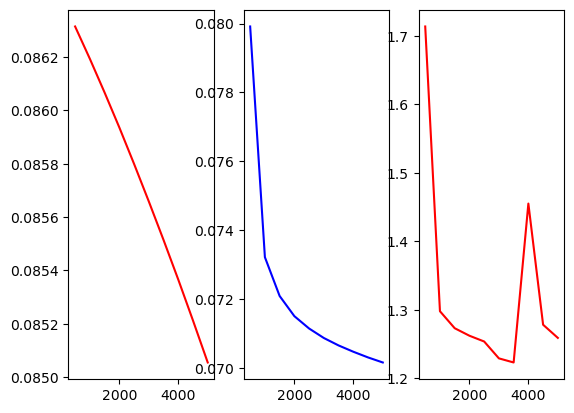

In [18]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,3),(0,0), colspan = 1)
ax2 = plt.subplot2grid((1,3),(0,1), colspan = 1)
ax3 = plt.subplot2grid((1,3),(0,2), colspan = 1)
ax1.plot([500,1000,1500,2000,2500,3000,3500,4000,4500,5000], loss_hist[0:10] , color = 'r')
ax2.plot([500,1000,1500,2000,2500,3000,3500,4000,4500,5000], loss_hist[10:20], color = 'b')
ax3.plot([500,1000,1500,2000,2500,3000,3500,4000,4500,5000], loss_hist[20:30], color = 'r')

#### 12) Evaluation on Train Set - 

In [45]:
with torch.no_grad():
        y_pred = model(X_test)
        y_cls = torch.argmax(y_pred,dim = 1)
        accuracy = y_cls.eq(y_test).sum() / float(y_test.shape[0])
        print(f"accuracy = {accuracy*100:.5f}")

accuracy = 97.00918


## GUI Part - 

#### 1) Importing Relevant Modules - 

In [46]:
from tkinter import * 
from PIL import ImageTk ,Image  
from tkinter import ttk

#### 2) Using Tkinter to implement a basic window for inputs - 

In [48]:
root = Tk()

#Rainfall.drop(index = [250, 336, 536, 500])
#Rainfall.set_index('DISTRICT', inplace = True)
def getvals():
    print("submitting form")
    Pout = Pvalue.get()
    Nout = Nvalue.get()
    Kout = Kvalue.get()
    Phout = Phvalue.get()
    Marketout = Marketvalue.get()
    districtOut = District.get()
    day =Dayvalue.get()
    month = int(Monthvalue.get())
    if(month == 1 or month == 2):
        rainfall = Rainfall.loc[districtOut,'Mar-May']
    elif(month >=3 and (month <= 5 and day < 15)):
        rainfall = Rainfall.loc[districtOut,'Mar-May']
    elif(month > 5 and (month <= 9 and day < 15)):
        rainfall = Rainfall.loc[districtOut, 'Jun-Sep']
    elif(month > 10):
        rainfall = Rainfall.loc[districtOut, 'Oct-Dec'] + Rainfall.loc[districtOut, 'Jan-Feb']
    else:
        rainfall = 0
    Invout = Investvalue.get()
    hectout = Landvalue.get()
    hectout = 1
    Price = 1.15*Invout/(1.3*hectout)
    temp_arr = np.array([[Price,Nout,Pout,Kout,Phout,rainfall]], dtype = 'float32')
    temp_arr = Scaler.transform(temp_arr)
    temp_arr = torch.from_numpy(temp_arr.astype("float32"))
    y_ = model(temp_arr)
    y_ = torch.argmax(y_, dim = 1).item()
    print(crop_label_dict.get(y_))
    crop = crop_label_dict.get(y_)
    final.config(text=f"The crop predicted is : {crop}!")
    print(crop)

#GUI logic
root.geometry("1000x450")
root.minsize(250,100)
root.maxsize(1900,1000)

# f1 = Frame(root,bg="black",borderwidth=6)
# f1.grid()

#Title is given here
title1 = Label(root,text="Crop Predictor")
title1.place(relx=0.5,rely=0.01,anchor=CENTER)

#making all the labels
N = Label(root,text="""Enter Nitrogen content in soil:""")
P = Label(root,text="""Enter Phosphorus content in soil:""")
K = Label(root,text="""Enter Potassium content in soil:""")
Ph = Label(root,text="""Enter Ph Value of the soil:""")
Month = Label(root,text="""Enter the month """)
Day = Label(root,text="Enter the day")
Land = Label(root,text="""Enter your Land Size in hectares""")
invest = Label(root, text="""Enter the amount you can invest""")
district = Label(root,text="Enter your district")
market = Label(root,text="Choose prefered market")
final = Label(root,text = "")

# States = []

#placing the things on thw window
N.place(relx=0.01,rely=0.2,anchor=W)
P.place(relx=0.01,rely=0.3,anchor=W)
K.place(relx=0.01,rely=0.4,anchor=W)
Ph.place(relx=0.01,rely=0.5,anchor=W)
Land.place(relx=0.01,rely=0.6,anchor=W)
Month.place(relx=0.01,rely=0.7,anchor=W)
Day.place(relx=0.01,rely=0.8,anchor=W)
invest.place(relx=0.5,rely=0.2,anchor=W)
district.place(relx=0.8,rely=0.3,anchor=W)
market.place(relx = 0.5,rely=0.3,anchor=W)
final.place(relx=0.5,rely=0.8,anchor=W)

#tkinter variable 
Nvalue = IntVar()
Pvalue = IntVar()
Kvalue = IntVar()
Phvalue = DoubleVar()
Monthvalue = IntVar()
Dayvalue = IntVar()
Investvalue = DoubleVar()
District = StringVar()
Landvalue = DoubleVar()
Marketvalue = StringVar()

#entry field
Nentry = Entry(root,textvariable=Nvalue)
Pentry = Entry(root,textvariable=Pvalue)
Kentry = Entry(root,textvariable=Kvalue)
Phentry = Entry(root,textvariable=Phvalue)
Monthentry = Entry(root,textvariable=Monthvalue)
Dayentry = Entry(root,textvariable=Dayvalue)
Investentry = Entry(root,textvariable=Investvalue)
Landentry = Entry(root,textvariable=Landvalue)
District = ttk.Combobox(root,textvariable=District) 
Market = ttk.Combobox(root,textvariable=Marketvalue)

#plot the entry thing
Nentry.place(relx=0.3,rely=0.2,anchor=W)
Pentry.place(relx=0.3,rely=0.3,anchor=W)
Kentry.place(relx=0.3,rely=0.4,anchor=W)
Phentry.place(relx=0.3,rely=0.5,anchor=W)
Monthentry.place(relx=0.3,rely=0.7,anchor=W)
Dayentry.place(relx=0.3,rely=0.8,anchor=W)
Investentry.place(relx=0.7,rely=0.2,anchor=W)
Landentry.place(relx=0.3,rely=0.6,anchor=W)

District['values'] = ["NICOBAR","SOUTH ANDAMAN","N & M ANDAMAN","LOHIT","EAST SIANG","SUBANSIRI F.D","TIRAP","ANJAW (LOHIT)","LOWER DIBANG",
                      "CHANGLANG","PAPUM PARE","LOW SUBANSIRI","UPPER SIANG","WEST SIANG","DIBANG VALLEY","WEST KAMENG","EAST KAMENG",
                      "TAWANG(W KAME)","KURUNG KUMEY","CACHAR","DARRANG","GOALPARA","KAMRUP","LAKHIMPUR","NORTH CACHAR","NAGAON","SIVASAGAR",
                      "BARPETA","DHUBRI","DIBRUGARH","JORHAT","KARIMGANJ","KOKRAJHAR","SHONITPUR","GOLAGHAT","TINSUKIA","DHEMAJI(LAKHI)",
                      "KARBI ANGLONG","UDALGURI(DARA)","KAMRUP METROP","CHIRANG(BONGAI)","BAKSA BARPETA","BONGAIGAON","MORIGAON","NALBARI",
                      "EAST KHASI HI","JAINTIA HILLS","EAST GARO HIL","RI-BHOI","SOUTH GARO HI","W KHASI HILL","WEST GARO HIL","IMPHAL EAST",
                      "SENAPATI","TAMENGLONG","CHANDEL","UKHRUL","THOUBAL","BISHNUPUR","IMPHAL WEST","CHURACHANDPUR","AIZAWL","CHAMPHAI",
                      "KOLASIB","LUNGLEI","CHHIMTUIPUI","LAWNGTLAI","SAIHA","SERCHHIP","KOHIMA","TUENSANG","MOKOKCHUNG","DIMAPUR","WOKHA",
                      "MON","ZUNHEBOTO","PHEK","KEPHRIE","LONGLENG","PEREN","NORTH TRIPURA","SOUTH TRIPURA","WEST TRIPURA","DHALAI","COOCH BEHAR",
                      "DARJEELING","JALPAIGURI","MALDA","SOUTH DINAJPUR","NORTH DINAJPUR","NORTH SIKKIM","EAST SIKKIM","WEST SIKKIM","SOUTH SIKKIM",
                      "BANKURA","BIRBHUM","BURDWAN","HOOGHLY","HOWRAH","PURULIA","MURSHIDABAD","NADIA","NORTH 24 PARG","SOUTH 24 PARG","EAST MIDNAPOR",
                      "WEST MIDNAPOR","KOLKATA","BALASORE","BOLANGIR","KANDHAMAL/PHU","CUTTACK","DHENKANAL","GANJAM","KALAHANDI","KEONDJHARGARH",
                      "KORAPUT","MAYURBHANJ","PURI","SAMBALPUR","SUNDARGARH","BHADRAK","JAJPUR","KENDRAPARA","ANGUL","NAWAPARA","MALKANGIRI",
                      "NAWARANGPUR","NAYAGARH","KHURDA","BARGARH","JHARSUGUDA","DEOGARH","RAYAGADA","GAJAPATI","JAGATSINGHAPU","BOUDHGARH",
                      "SONEPUR","BOKARO","DHANBAD","DUMKA","HAZARIBAG","PALAMU","RANCHI","SAHIBGANJ","WEST SINGHBHUM","DEOGHAR","GIRIDIH",
                      "GODDA","GUMLA","LOHARDAGA","CHATRA","KODERMA","PAKUR","EAST SINGHBHU","GARHWA","SERAIKELA-KHA","JAMTARA","LATEHAR",
                      "SIMDEGA","KHUNTI(RANCHI","RAMGARH","BHAGALPUR","EAST CHAMPARAN","DARBHANGA","GAYA","MUNGER","MUZAFFARPUR","WEST CHAMPARAN",
                      "PURNEA","GOPALGANJ","MADHUBANI","AURANGABAD","BEGUSARAI","BHOJPUR","NALANDA","PATNA","KATIHAR","KHAGARIA","SARAN","MADHEPURA",
                      "NAWADA","ROHTAS","SAMASTIPUR","SITAMARHI","SIWAN","VAISHALI","JAHANABAD","BUXAR","ARARIA","BANKA","BHABUA","JAMUI",
                      "KISHANGANJ","SHEIKHPURA","SUPAUL","LAKHISARAI","SHEOHAR","ARWAL","SAHARSA","ALLAHABAD","AZAMGARH","BAHRAICH","BALLIA",
                      "BANDA","BARABANKI","BASTI","DEORIA","FAIZABAD","FARRUKHABAD","FATEHPUR","GHAZIPUR","GONDA","GORAKHPUR","HARDOI","JAUNPUR",
                      "KANPUR NAGAR","KHERI LAKHIMP","LUCKNOW","MIRZAPUR","PRATAPGARH","RAE BARELI","SITAPUR","SULTANPUR","UNNAO","VARANASI",
                      "SONBHADRA","MAHARAJGANJ","MAU","SIDDHARTH NGR","KUSHINAGAR","AMBEDKAR NAGAR","KANNAUJ","BALRAMPUR","KAUSHAMBI","SAHUJI MAHARA",
                      "KANPUR DEHAT","CHANDAULI","SANT KABIR NGR","SANT RAVIDAS","SHRAVASTI NGR","AGRA","ALIGARH","BAREILLY","BIJNOR","BADAUN",
                      "BULANDSHAHAR","ETAH","ETAWAH","HAMIRPUR","JALAUN","JHANSI","LALITPUR","MAINPURI","MATHURA","MEERUT","MORADABAD","MUZAFFARNAGAR",
                      "PILIBHIT","RAMPUR","SAHARANPUR","SHAHJAHANPUR","GHAZIABAD","FIROZABAD","MAHOBA","MAHAMAYA NAGA","AURAIYA","BAGPAT","JYOTIBA PHULE",
                      "GAUTAM BUDDHA","KANSHIRAM NAG","ALMORA","CHAMOLI","DEHRADUN","GARHWAL PAURI","NAINITAL","PITHORAGARH","GARHWAL TEHRI","UTTARKASHI",
                      "HARIDWAR","CHAMPAWAT","RUDRAPRAYAG","UDHAM SINGH N","BAGESHWAR","AMBALA","GURGAON","HISAR","JIND","KARNAL","MAHENDRAGARH","ROHTAK",
                      "BHIWANI","FARIDABAD","KURUKSHETRA","SIRSA","SONEPAT(RTK)","YAMUNANAGAR","KAITHAL","PANIPAT","REWARI","FATEHABAD","JHAJJAR","PANCHKULA",
                      "MEWAT","PALWAL(FRD)","CHANDIGARH","NEW DELHI","CENTRAL DELHI","EAST DELHI","NORTH DELHI","NE DELHI","SW DELHI","NW DELHI","SOUTH DELHI",
                      "WEST DELHI","AMRITSAR","BATHINDA","FEROZEPUR","GURDASPUR","HOSHIARPUR","JALANDHAR","KAPURTHALA","LUDHIANA","PATIALA","RUPNAGAR",
                      "SANGRUR","FARIDKOT","MOGA","NAWANSHAHR",
"FATEHGARH SAH",
"MUKTSAR",
"MANSA",
"BARNALA",
"SAS NAGAR(MGA)",
"TARN TARAN",
"BILASPUR",
"CHAMBA",
"KANGRA",
"KINNAUR",
"KULLU",
"LAHUL & SPITI",
"MANDI",
"SHIMLA",
"SIRMAUR",
"SOLAN",
"UNA",
"ANANTNAG",
"BARAMULLA",
"DODA",
"JAMMU",
"KATHUA",
"LADAKH (LEH)",
"UDHAMPUR",
"BADGAM",
"KUPWARA",
"PULWAMA",
"SRINAGAR",
"KARGIL",
"POONCH",
"RAJOURI",
"BANDIPORE",
"GANDERWAL",
"KULGAM/(ANT)",
"SHOPAN",
"SAMBA",
"KISTWAR",
"REASI",
"RAMBAN(DDA)",
"BARMER",
"BIKANER",
"CHURU",
"SRI GANGANAGA",
"JAISALMER",
"JALORE",
"JODHPUR",
"NAGAUR",
"PALI",
"HANUMANGARH",
"AJMER",
"ALWAR",
"BANSWARA",
"BHARATPUR",
"BHILWARA",
"BUNDI",
"CHITTORGARH",
"DUNGARPUR",
"JAIPUR",
"JHALAWAR",
"JHUNJHUNU",
"KOTA",
"SAWAI MADHOPUR",
"SIKAR",
"SIROHI",
"TONK",
"UDAIPUR",
"DHOLPUR",
"BARAN",
"DAUSA",
"RAJSAMAND",
"KARAULI",
"PRATAPGARH(CHT",
"BETUL",
"VIDISHA",
"BHIND",
"DATIA",
"DEWAS",
"DHAR",
"GUNA",
"GWALIOR",
"HOSHANGABAD",
"INDORE",
"JHABUA",
"MANDSAUR",
"MORENA",
"KHANDWA",
"KHARGONE",
"RAISEN",
"RAJGARH",
"RATLAM",
"SEHORE",
"SHAJAPUR",
"SHIVPURI",
"UJJAIN",
"BHOPAL",
"HARDA",
"NEEMUCH",
"SHEOPUR",
"BARWANI",
"ASHOKNAGAR(GNA",
"BURHANPUR",
"ALIRAJPUR(JBA)",
"BALAGHAT",
"CHHATARPUR",
"CHHINDWARA",
"JABALPUR",
"MANDLA",
"NARSINGHPUR",
"PANNA",
"REWA",
"SAGAR",
"SATNA",
"SEONI",
"SHAHDOL",
"SIDHI",
"TIKAMGARH",
"KATNI",
"DINDORI",
"UMARIA",
"DAMOH",
"ANUPPUR(SHAHD",
"SINGRAULI",
"AHMEDABAD",
"BANASKANTHA",
"BARODA",
"BHARUCH",
"VALSAD",
"DANGS",
"KHEDA",
"MEHSANA",
"PANCHMAHALS",
"SABARKANTHA",
"SURAT",
"GANDHINAGAR",
"NARMADA(BRC)",
"NAVSARI(VSD)",
"ANAND(KHR)",
"PATAN(MHSN)",
"DAHOD(PNML)",
"TAPI(SRT)",
"AMRELI",
"BHAVNAGAR",
"JAMNAGAR",
"JUNAGADH",
"KUTCH",
"RAJKOT",
"SURENDRANAGAR",
"PORBANDAR",
"DNH",
"DAMAN",
"DIU",
"MUMBAI CITY",
"RAIGAD",
"RATNAGIRI",
"THANE",
"SINDHUDURG",
"MUMBAI SUB",
"NORTH GOA",
"SOUTH GOA",
"AHMEDNAGAR",
"DHULE",
"JALGAON",
"KOLHAPUR",
"NASHIK",
"PUNE",
"SANGLI",
"SATARA",
"SOLAPUR",
"NANDURBAR",
"BEED",
"NANDED",
"OSMANABAD",
"PARBHANI",
"LATUR",
"JALNA",
"HINGOLI",
"AKOLA",
"AMRAVATI",
"BHANDARA",
"BULDHANA",
"CHANDRAPUR",
"NAGPUR",
"YAVATMAL",
"WARDHA",
"GADCHIROLI",
"WASHIM",
"GONDIA",
"BASTAR",
"DURG",
"RAIGARH",
"RAIPUR",
"SURGUJA",
"RAJNANDGAON",
"DANTEWADA",
"KANKER (NORH",
"JANJGIR-CHAMP",
"KORBA",
"JASHPUR",
"DHAMTARI",
"MAHASAMUND",
"KORIYA",
"KOWARDHA (KAB",
"NARAYANPUR",
"BIJAPUR",
"EAST GODAVARI",
"WEST GODAVARI",
"GUNTUR",
"KRISHNA",
"NELLORE",
"PRAKASAM",
"SRIKAKULAM",
"VISAKHAPATNAM",
"VIZIANAGARAM",
"ADILABAD",
"HYDERABAD",
"KARIMNAGAR",
"KHAMMAM",
"MAHABUBNAGAR",
"MEDAK",
"NALGONDA",
"NIZAMABAD",
"WARANGAL",
"RANGAREDDY",
"ANANTAPUR",
"CHITTOOR",
"KUDDAPAH",
"KURNOOL",
"VELLORE",
"COIMBATORE",
"DHARMAPURI",
"KANYAKUMARI",
"CHENNAI",
"MADURAI",
"NILGIRIS",
"RAMANATHAPURA",
"SALEM",
"THANJAVUR",
"TIRUCHIRAPPAL",
"TIRUNELVELI",
"ERODE",
"PUDUKKOTTAI",
"DINDIGUL",
"VIRUDHUNAGAR",
"SIVAGANGA",
"THOOTHUKUDI",
"TIRUVANNAMALA",
"NAGAPATTINAM",
"VILUPPURAM",
"CUDDALORE",
"KANCHIPURAM",
"TIRUVALLUR",
"THENI",
"NAMAKKAL",
"KARUR",
"PERAMBALUR",
"TIRUVARUR",
"KRISHNAGIRI",
"ARIYALUR",
"TIRUPUR",
"PONDICHERRY",
"KARAIKAL",
"MAHE",
"YANAM",
"UTTAR KANNADA",
"DAKSHIN KANDA",
"UDUPI",
"BELGAM",
"BIDAR",
"DHARWAD",
"GULBARGA",
"YADGIR",
"RAICHUR",
"BAGALKOTE",
"GADAG",
"HAVERI",
"KOPPAL",
"BANGALORE RUR",
"BELLARY",
"CHIKMAGALUR",
"CHITRADURGA",
"KODAGU",
"HASSAN",
"KOLAR",
"MANDYA",
"MYSORE",
"SHIMOGA",
"TUMKUR",
"BANGALORE URB",
"CHAMARAJANAGA",
"DAVANGERE",
"RAMNAGAR(BNGR)",
"CHICKBALLAPUR",
"ALAPPUZHA",
"CANNUR",
"ERNAKULAM",
"KOTTAYAM",
"KOZHIKODE",
"MALAPPURAM",
"PALAKKAD",
"KOLLAM",
"THRISSUR",
"THIRUVANANTHA",
"IDUKKI",
"KASARGOD",
"PATHANAMTHITTA",
"WAYANAD","LAKSHADWEEP"]

Market['values']=["Port Blair",
"Kalikiri",
"Mulakalacheruvu",
"Vayalapadu",
"Banaganapalli",
"Attili",
"Cachar",
"Kharupetia",
"Gauripur",
"Jorhat",
"Pamohi(Garchuk)",
"Dhekiajuli",
"Jagdalpur",
"Charama",
"Lakhanpuri",
"Narharpur",
"Pratappur",
"Sanquelim",
"Damnagar",
"Khambhat(Grain Market)",
"Umreth",
"Ankleshwar",
"Bachau",
"Nadiyad(Chaklasi)",
"Gogamba",
"Gogamba(Similiya)",
"Bardoli(Katod)",
"Mandvi",
"S.Mandvi",
"Vyra",
"Bodeli",
"Bodeli(Hadod)",
"Bodeli(Kalediya)",
"Bodeli(Modasar)",
"Padra",
"Chikli(Khorgam)",
"Shahzadpur",
"Faridabad",
"Pataudi",
"Pipli",
"Taura",
"Madlauda",
"Kangra(Jaisinghpur)",
"Kangra(Jassour)",
"Palampur",
"Bhuntar",
"Zaloosa-Chararishrief (F&V)",
"Ramanagara",
"Kolar",
"Gubbi",
"Aroor",
"Chengannur",
"Mannar",
"Piravam",
"Taliparamba",
"Kasargod",
"Manjeswaram",
"Anchal",
"Chathanoor",
"Kaliyanchanda",
"Ettumanoor",
"Kottayam",
"Kondotty",
"Chelakkara",
"Irinjalakkuda",
"Kodungalloor",
"Maranelloor",
"Parassala",
"Jaithari",
"Sendhwa",
"Dhar",
"Dhar(F&V)",
"Gorakhpur",
"Thandla",
"Pandhana(F&V)",
"Gadarwada",
"Sheopurkalan",
"Syopurkalan(F&V)",
"Newasa(Ghodegaon)",
"Rahata",
"Deoulgaon Raja",
"Yawal",
"Kolhapur",
"Kolhapur(Malkapur)",
"Savner",
"Bhokar",
"Lasalgaon(Niphad)",
"Pune",
"Pune(Hadapsar)",
"Pune(Khadiki)",
"Pune(Pimpri)",
"Karad",
"Akluj",
"Mangal Wedha",
"Pandharpur",
"Bishenpur",
"Moreh",
"Lamlong Bazaar",
"Imphal",
"Thoubal",
"Shillong",
"Mangkolemba",
"Angul",
"Angul(Jarapada)",
"Pallahara",
"Jaleswar",
"Nilagiri",
"Godabhaga",
"Hindol",
"Kasinagar",
"Parlakhemundi",
"Bhanjanagar",
"Digapahandi",
"Jharsuguda",
"Betnoti",
"Saraskana",
"Nawarangpur",
"Bonai",
"Panposh",
"Karaikal",
"Chogawan",
"Mehta",
"Dhanaula",
"Bhucho",
"Dera Baba Nanak",
"Dhariwal",
"Kalanaur",
"Dasuya",
"Adampur",
"Lohian Khas",
"Mehatpur",
"Doraha",
"Sahnewal",
"Mansa",
"Malout",
"Ghanaur",
"Rajpura",
"Morinda",
"Harike",
"Patti",
"Anta",
"Barmer",
"Lunkaransar",
"Begu",
"Jalore",
"Khanpur",
"Itawa",
"Sri Madhopur",
"Surajgarh",
"Deoli",
"Uniyara",
"Anaimalai",
"Annur",
"Coimbatore",
"Karamadai",
"Madathukulam",
"Negamam",
"Palladam",
"Pethappampatti",
"Pollachi",
"Pongalur",
"Pudupalayam",
"Senjeri",
"Sevur",
"Thondamuthur",
"Udumalpet",
"Cuddalore",
"Kurinchipadi",
"Dharampuri",
"Palakode",
"Papparapatti",
"Pappireddipatti",
"Pennagaram",
"Gopalpatti",
"Palani",
"Dharapuram",
"Elumathur",
"Kodumudi",
"Kunnathur",
"Muthur",
"Vellakkoil",
"Acharapakkam",
"Chengalpattu",
"Gummidipoondy",
"Kanchipuram",
"Maduranthagam",
"Pallipattu",
"Ponner",
"Sunguvarchatram",
"Uthiramerur",
"Bargur",
"Pochampalli",
"Uthangarai",
"Melur",
"Thirumangalam",
"Kalliakavillai",
"Namagiripettai",
"Namakkal",
"Rasipuram",
"Tiruchengode",
"Velur",
"Sivagangai",
"Attur",
"Gangavalli",
"Karumanturai",
"Kolathur",
"Konganapuram",
"Omalur",
"Salem",
"Thalaivasal",
"Thammampati",
"Vazhapadi",
"Singampuneri",
"Budalur",
"Kumbakonam",
"Orathanadu",
"Papanasam",
"Thanjavur",
"Thiruppananthal",
"Vallam",
"Cheyyar",
"Ammoor",
"Kalavai",
"Vellore",
"Avalurpet",
"Chinnasalem",
"Gingee",
"Kallakurichi",
"Manalurpet",
"Sangarapuram",
"Tindivanam",
"Tiruvennainallur",
"Vikkiravandi",
"Villupuram",
"Rajapalayam",
"Sathur",
"Mahboob Manison",
"Koratla",
"Vemulawada",
"Madhira",
"Nalgonda",
"Ramannapet",
"Voligonda",
"Pitlam",
"Chevella",
"Dasda",
"Bishalgarh",
"Bishramganj",
"Barpathari",
"Achnera",
"Fatehabad",
"Jagnair",
"Jarar",
"Khairagarh",
"Samsabad",
"Atrauli",
"Sirsa",
"Bagpat",
"Baraut",
"Mihipurwa",
"Risia",
"Ruperdeeha",
"Chitwadagaon",
"Gopiganj",
"Divai",
"Gulavati",
"Siyana",
"Mau(Chitrakut)",
"Aliganj",
"Jasvantnagar",
"Kamlaganj",
"Bindki",
"Kishunpur",
"Javer",
"Hapur",
"Ait",
"Kadaura",
"Baruwasagar",
"Chirgaon",
"Chhibramau(Kannuj)",
"Rura",
"Mohammdi",
"Tikonia",
"Paliakala",
"Charkhari",
"Doharighat",
"Mirzapur",
"Sambhal",
"Muzzafarnagar",
"Shahpur",
"Thanabhawan",
"Lalganj",
"Milak",
"Chutmalpur",
"Devband",
"Gangoh",
"Nakud",
"Nanuta",
"Sultanpurchilkana",
"Jalalabad",
"Viswan",
"Dudhi",
"Robertsganj",
"Dehradoon",
"Kashipur",
"Bishnupur(Bankura)",
"Khatra",
"Asansol",
"Burdwan",
"Guskara(Burdwan)",
"Kalna",
"Katwa",
"Memari",
"Pandua",
"Dhupguri",
"Samsi",
"Ghatal",
"Beldanga",
"Jangipur",
"Nadia",
"Habra",
"Balarampur",
"Purulia",
"Baruipur(Canning)",
"Islampur","Raiganj"]
District.place(relx=0.8,rely=0.45,relheight=0.25,relwidth=0.15,anchor=W)
Market.place(relx=0.5,rely=0.45,relheight=0.25,relwidth=0.15,anchor =W)
# #label for the state
# ttk.Label(root, text = "Select the Month :")
# n = tk.StringVar()
# monthchoosen = ttk.Combobox(root, width = 27, textvariable = n)
# monthchoosen['values'] = ()
  
# monthchoosen.pack()
# monthchoosen.current()
Button(text="submit to get your ideal crop",command=getvals).place(relx=0.8,rely=0.7 , anchor=W)
listtemp = getvals()
root.mainloop()

submitting form
mango
mango


## THANK YOU!